#### Import libraries and load data

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# Load Data
data = pd.read_csv("processed_data.txt", sep="|")
data.head()

,Gender,Age_Scaled,Salary_Transformed_Scaled,Purchased
0,1,-1.781797,-1.809254,0
1,1,-0.253587,-1.752550,0
2,0,-1.113206,-0.725701,0
3,0,-1.017692,-0.246493,0
4,1,-1.781797,0.311281,0


#### Define model features and inputs

In [5]:
# Define features
X = data[["Gender", "Age_Scaled", "Salary_Transformed_Scaled"]]

In [6]:
# Define target
y = data["Purchased"]

#### Divide data into testing and training sets

In [8]:
# Divide data into training and testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=25)

In [9]:
# Convert train and test data sets into tensors
import tensorflow as tf
tf.random.set_seed(15)

#### Define model and parameters

In [11]:
# Define model and layers
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,)), 
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [12]:
# Define model attributes
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

#### Train and evaluate model

In [14]:
# Train model
history = model.fit(X_train, y_train, batch_size=5, epochs=10, verbose=1, validation_data=(X_test, y_test))
history

Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6207 - loss: 0.7187 - val_accuracy: 0.7000 - val_loss: 0.6275
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7052 - loss: 0.5975 - val_accuracy: 0.7167 - val_loss: 0.5365
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7357 - loss: 0.5128 - val_accuracy: 0.7667 - val_loss: 0.4714
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8083 - loss: 0.4517 - val_accuracy: 0.7833 - val_loss: 0.4240
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8540 - loss: 0.4078 - val_accuracy: 0.8167 - val_loss: 0.3898
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8566 - loss: 0.3767 - val_accuracy: 0.8333 - val_loss: 0.3643
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8543 - loss: 0.3543 - val_accuracy: 0.8333 - val_loss: 0.3444
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8546 - loss: 0.3376 - val_accuracy: 0.8333 - val_loss:

In [15]:
# Evaluate model
results = model.evaluate(X_test, y_test, batch_size=5)
print("Model testing accuracy is", round(results[1], 3), "\nModel testing loss is", round(results[0], 3))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9332 - loss: 0.2722 
Model testing accuracy is 0.867 
Model testing loss is 0.303


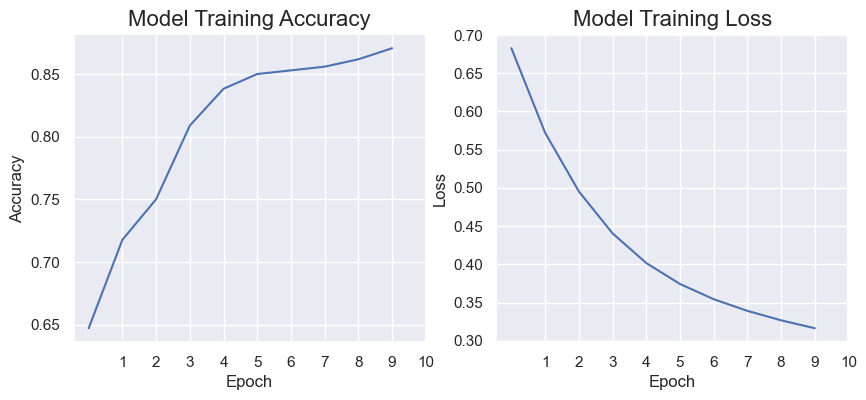

In [16]:
# Plot accuracy and loss
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(history.history["accuracy"])
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.set_xticks(np.arange(1,11,1))
ax1.set_title("Model Training Accuracy", fontsize=16)

ax2.plot(history.history["loss"])
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.set_xticks(np.arange(1,11,1))
ax2.set_title("Model Training Loss", fontsize=16)
plt.show()

In [39]:
# Predictions from testing data
y_pred = model.predict(X_test)

# Set theshold
threshold = 0.60
y_pred_with_threshold = np.where(y_pred > threshold, 1, 0)

# Generate confusion matrix
tf.math.confusion_matrix(y_test, y_pred_with_threshold)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[34,  4],
       [ 5, 17]])>

#### Generate predictions based on new data

In [31]:
# Import scaler object from "Preprocessing" notebook
%store -r scaler

In [33]:
# Function to make predictions from a set of input tensors
def predict_with_new_data(input):
    scaled_input = scaler.fit_transform(input)
    scaled_input_tensor = tf.convert_to_tensor(scaled_input, dtype=tf.float32)
    prediction = model.predict(tf.stack(scaled_input_tensor))
    return tf.round(prediction * 1000.0) / 1000.0

In [35]:
# Generate new, random data to test model
random_new_data = []

for i in np.arange(1,11):
    gender_random = np.random.choice([0, 1]) # Gender
    age_random = int(np.random.uniform(18, 65)) # Age
    salary_transformed_random = int(np.random.uniform(180, 400)) # Salary
    test_user_data = [gender_random, age_random, salary_transformed_random]
    random_new_data.append(test_user_data)

random_new_data

[[0, 55, 319],
 [0, 41, 212],
 [0, 33, 207],
 [0, 32, 194],
 [0, 31, 299],
 [1, 28, 201],
 [0, 33, 352],
 [1, 59, 263],
 [0, 32, 266],
 [1, 38, 376]]

In [37]:
# Run prediction on randomized new data
new_predictions = predict_with_new_data(random_new_data)
new_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.825],
       [0.384],
       [0.082],
       [0.063],
       [0.174],
       [0.007],
       [0.523],
       [0.896],
       [0.107],
       [0.772]], dtype=float32)>